In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving best.index to best.index


{'best.index': b'\x00\x00\x06\x08\x01\x1a\x02\x08\x01\x00\x1c\x11_CHECKPOINTABLE_OBJECT_GRAPH\x08\x07\x12\x00 \xa0\x9a\xfe\r(\xa1<58\x1cY3\x004\x13layer_with_weights-0/bias/.ATTRIBUTES/VARIABLE_VALUE\x08\x01\x12\x04\x12\x02\x08  \x80\t(\x80\x015\xf9\xfa\x80A\x1b7\x15OPTIMIZER_SLOT/optimizer/rms/.ATTRIBUTES/VARIABLE_VALUE\x08\x01\x12\x04\x12\x02\x08  \x9c\xa5\xff\x06(\x80\x015\x81RXw\x15!\x1ckernel/.ATTRIBUTES/VARIABLE_VALUE\x08\x01\x12\x10\x12\x02\x08\x03\x12\x02\x08\x03\x12\x02\x08\x01\x12\x02\x08 (\x80\t5s\xb4\xf9\x1d\x1d7!OPTIMIZER_SLOT/optimizer/rms/.ATTRIBUTES/VARIABLE_VALUE\x08\x01\x12\x10\x12\x02\x08\x03\x12\x02\x08\x03\x12\x02\x08\x01\x12\x02\x08  \x9c\x9c\xff\x06(\x80\t5:\x86ar\x13!\x131/beta/.ATTRIBUTES/VARIABLE_VALUE\x08\x01\x12\x04\x12\x02\x08  \x80\x0b(\x80\x015\x821\xdb\x05\x1b7\x15OPTIMIZER_SLOT/optimizer/rms/.ATTRIBUTES/VARIABLE_VALUE\x08\x01\x12\x04\x12\x02\x08  \x9c\xa7\xff\x06(\x80\x015\x1f\xf1\x10s\x15 \x13gamma/.ATTRIBUTES/VARIABLE_VALUE\x08\x01\x12\x04\x12\x02\x08

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d 'paultimothymooney/chest-xray-pneumonia'

100% 2.29G/2.29G [00:14<00:00, 212MB/s]
100% 2.29G/2.29G [00:14<00:00, 170MB/s]


In [ ]:
! unzip chest-xray-pneumonia.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  infl

<h2>Import libraries</h2>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd 

<h2>Load data from directory</h2>

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('chest_xray/chest_xray/train')
test = get_training_data('chest_xray/chest_xray/test')
val = get_training_data('chest_xray/chest_xray/val')

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Text(0.5, 1.0, 'NORMAL')

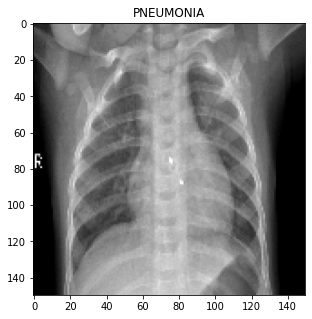

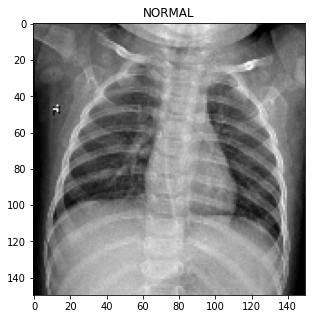

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

<h2>Image augmentation</h2>

In [ ]:
datagen = ImageDataGenerator(rotation_range = 30,
                             zoom_range = 0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip = True,
                             vertical_flip=False)

datagen.fit(x_train)

<h2>Neural network model class</h2>

In [ ]:
class NNModel:
    def __init__(self, model, bs=32):
        self.model = model
        self.batch_size = bs

    def fit(self):
        learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)
        self.history = self.model.fit(datagen.flow(x_train, y_train, batch_size=self.batch_size), epochs = 10, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction])

    def test(self):
        print("Loss of the model is - " , self.model.evaluate(x_test, y_test)[0])
        print("Accuracy of the model is - " , self.model.evaluate(x_test, y_test)[1] * 100 , "%")

    def plot(self, title):
        predictions = self.model.predict(x_test)
        pred = []
        for x in predictions:
            if x < 0.5:
                pred.append(0)
            else:
                pred.append(1)
        cm = confusion_matrix(y_test, pred)
        cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
        plt.figure(figsize=(10,10))
        sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels).set(title=title)
    
    def print(self):
        predictions = self.model.predict(x_test)
        pred = []
        for x in predictions:
            if x < 0.5:
                pred.append(0)
            else:
                pred.append(1)
        print(classification_report(y_test, pred, target_names = ['Pneumonia (Class 0)', 'Normal (Class 1)']))

<h2>Artificial neural network</h2>

In [ ]:
def get_ann_model():
    inputs = keras.Input(shape=(150, 150, 1))
    flatten_layer = Flatten()(inputs)
    dense_layer = Dense(128, activation='relu')(flatten_layer)
    outputs = Dense(1, activation='sigmoid')(dense_layer)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
m = get_ann_model()
m.load_weights('ANN')
model = NNModel(m)

In [ ]:
model.fit()

Epoch 1/10
163/163 [==============================] - 16s 93ms/step - loss: 0.9478 - accuracy: 0.7186 - val_loss: 0.7591 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 18s 113ms/step - loss: 0.5011 - accuracy: 0.7730 - val_loss: 0.7259 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 14s 87ms/step - loss: 0.4967 - accuracy: 0.7774 - val_loss: 0.7725 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 14s 87ms/step - loss: 0.4590 - accuracy: 0.7960 - val_loss: 0.8376 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 14s 88ms/step - loss: 0.4459 - accuracy: 0.7924 - val_loss: 1.2321 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - ETA: 0s - loss: 0.4299 - accuracy: 0.8079
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] -

In [ ]:
model.test()

20/20 [==============================] - 0s 7ms/step - loss: 0.4145 - accuracy: 0.8157
Loss of the model is -  0.4145238697528839
20/20 [==============================] - 0s 7ms/step - loss: 0.4145 - accuracy: 0.8157
Accuracy of the model is -  81.57051205635071 %


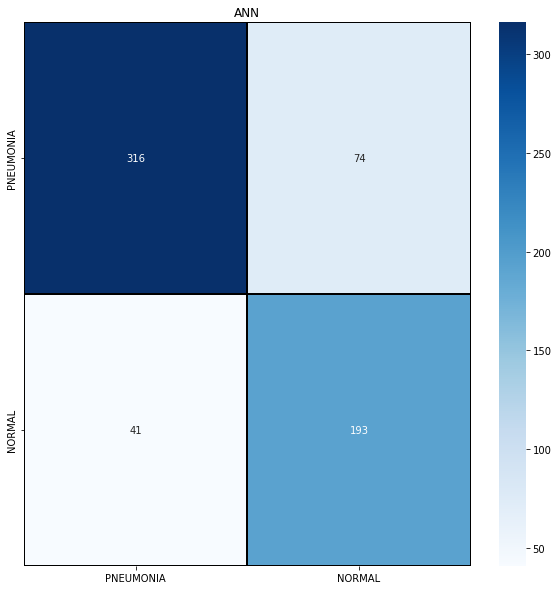

In [ ]:
model.plot('ANN')

In [ ]:
model.print()

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.89      0.81      0.85       390
   Normal (Class 1)       0.72      0.82      0.77       234

           accuracy                           0.82       624
          macro avg       0.80      0.82      0.81       624
       weighted avg       0.82      0.82      0.82       624



<h2>Convolutional neural network with regularization (Simple)</h2>

In [ ]:
def get_cnn_s_model():
    model = Sequential()
    model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 128 , activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
    model.summary()
    return model

In [ ]:
model = NNModel(get_cnn_s_model())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_16 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 75, 75, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
model.fit()

Epoch 1/10
163/163 [==============================] - 181s 1s/step - loss: 0.5702 - accuracy: 0.7598 - val_loss: 0.8642 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 177s 1s/step - loss: 0.3563 - accuracy: 0.8434 - val_loss: 0.7080 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 181s 1s/step - loss: 0.2919 - accuracy: 0.8783 - val_loss: 1.0977 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.8909
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 178s 1s/step - loss: 0.2604 - accuracy: 0.8909 - val_loss: 1.7985 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 177s 1s/step - loss: 0.1973 - accuracy: 0.9241 - val_loss: 0.4674 - val_accuracy: 0.8750 - lr: 3.0000e-04
Epoch 6/10
163/163 [==============================] - 1

In [ ]:
model.test()

20/20 [==============================] - 5s 242ms/step - loss: 0.3436 - accuracy: 0.9071
Loss of the model is -  0.34364888072013855
20/20 [==============================] - 5s 247ms/step - loss: 0.3436 - accuracy: 0.9071
Accuracy of the model is -  90.70512652397156 %


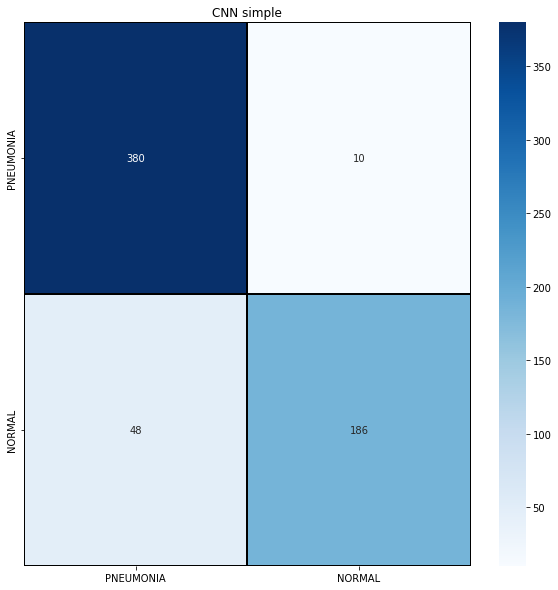

In [ ]:
model.plot('CNN simple')

<h2>Convolutional neural network</h2>

In [ ]:
def get_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 1)))
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
m = get_cnn_model()
m.load_weights('cnn-weights-noBatchDrop')
model = NNModel(m)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 19, 19, 128)     

In [ ]:
model.fit()

Epoch 1/10
163/163 [==============================] - 15s 91ms/step - loss: 0.3694 - accuracy: 0.8409 - val_loss: 0.7566 - val_accuracy: 0.5625 - lr: 1.0000e-06
Epoch 2/10
163/163 [==============================] - 15s 89ms/step - loss: 0.3647 - accuracy: 0.8493 - val_loss: 0.6111 - val_accuracy: 0.6250 - lr: 1.0000e-06
Epoch 3/10
163/163 [==============================] - 15s 89ms/step - loss: 0.3706 - accuracy: 0.8420 - val_loss: 0.8721 - val_accuracy: 0.6875 - lr: 1.0000e-06
Epoch 4/10
163/163 [==============================] - 16s 97ms/step - loss: 0.3741 - accuracy: 0.8414 - val_loss: 0.8363 - val_accuracy: 0.5625 - lr: 1.0000e-06
Epoch 5/10
163/163 [==============================] - 15s 91ms/step - loss: 0.3675 - accuracy: 0.8468 - val_loss: 0.6218 - val_accuracy: 0.6875 - lr: 1.0000e-06
Epoch 6/10
163/163 [==============================] - 14s 88ms/step - loss: 0.3775 - accuracy: 0.8416 - val_loss: 0.4573 - val_accuracy: 0.6875 - lr: 1.0000e-06
Epoch 7/10
163/163 [==============

In [ ]:
model.test()

20/20 [==============================] - 14s 675ms/step - loss: 0.3056 - accuracy: 0.8974
Loss of the model is -  0.30556145310401917
20/20 [==============================] - 9s 470ms/step - loss: 0.3056 - accuracy: 0.8974
Accuracy of the model is -  89.74359035491943 %


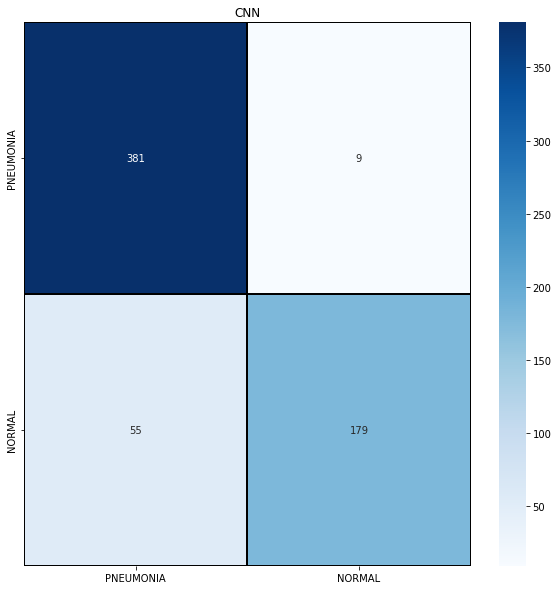

In [ ]:
model.plot('CNN')

In [ ]:
model.print()

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.87      0.98      0.92       390
   Normal (Class 1)       0.95      0.76      0.85       234

           accuracy                           0.90       624
          macro avg       0.91      0.87      0.89       624
       weighted avg       0.90      0.90      0.89       624



<h2>Convolutional neural network with regularization layers</h2>

In [ ]:
def get_cnn_r_model(optimizer='rmsprop'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
m = get_cnn_r_model()
m.load_weights('best')
nn_model = NNModel(m)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
nn_model.fit()

Epoch 1/10
163/163 [==============================] - 426s 3s/step - loss: 0.5183 - accuracy: 0.8786 - val_loss: 28.0202 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 421s 3s/step - loss: 0.2280 - accuracy: 0.9110 - val_loss: 27.3471 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9199
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 420s 3s/step - loss: 0.2086 - accuracy: 0.9199 - val_loss: 7.5162 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 422s 3s/step - loss: 0.1664 - accuracy: 0.9375 - val_loss: 11.7402 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/10
163/163 [==============================] - 421s 3s/step - loss: 0.1495 - accuracy: 0.9440 - val_loss: 6.8685 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 6/10
163/163 [============================

In [ ]:
nn_model.test()

20/20 [==============================] - 10s 485ms/step - loss: 0.2637 - accuracy: 0.9151
Loss of the model is -  0.26366156339645386
20/20 [==============================] - 9s 474ms/step - loss: 0.2637 - accuracy: 0.9151
Accuracy of the model is -  91.50640964508057 %


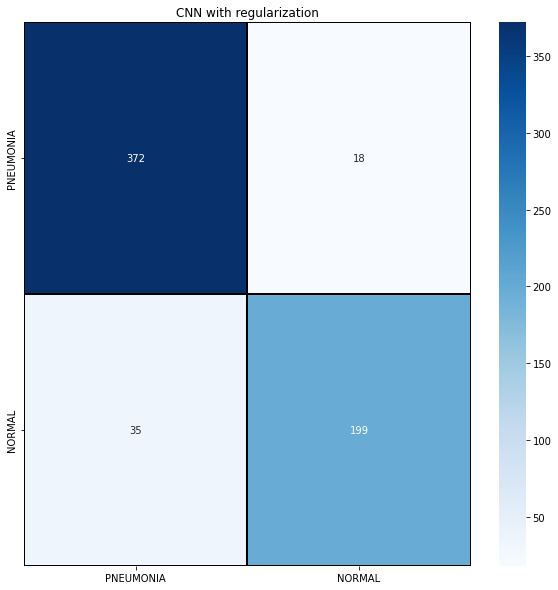

In [ ]:
nn_model.plot('CNN with regularization')

In [ ]:
nn_model.print()

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.91      0.95      0.93       390
   Normal (Class 1)       0.92      0.85      0.88       234

           accuracy                           0.92       624
          macro avg       0.92      0.90      0.91       624
       weighted avg       0.92      0.92      0.91       624

